In [1]:
import pandas as pd
df =pd.read_excel( r'C:\users\aramc\desktop\Final Year Project - 2025\dashboard\sp500_data.xlsx', sheet_name="Clean", parse_dates=["Date"])
df.tail()
proph = df.copy()
lsdata = df.copy()
df2 = df.copy()
ardf = df.copy()
lrdf = df.copy()
madf = df.copy()

In [2]:
df2["Day_of_Week"] = df2["Date"].dt.day_name()
df2["Month"] = df2["Date"].dt.month
df2["Year"] = df2["Date"].dt.year
df2.head()

,Date,Open,High,Low,Close,Volume,Day_of_Week,Month,Year
0,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3459930000,Thursday,1,2020
1,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3484700000,Friday,1,2020
2,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3702460000,Monday,1,2020
3,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3435910000,Tuesday,1,2020
4,2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3726840000,Wednesday,1,2020


# About the Data

In [3]:
df.shape

(1258, 6)

The data contains daily S&P data spanning from 01/01/2020 to 31/12/2024.  
There are a total of 1258 rows (unique days) and 6 columns (variables).  
The variables are **Date** (The specific trading day), **Open** (The price of the index when the market opens for trading on that date), **High** (The highest price reached during the trading session on that date), **Low** (The lowest price reached during the trading session on that date), **Close** (The price of index at the end of the trading session on that date) and **Volume** (The total number of shares traded during the day).

## Data Completeness

In [4]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

There are no variables with missing entries in the data.

# Exploratory Data Analysis

In [5]:
# Creating day of the wek , month and year columns
df["Day_of_Week"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df.tail()

,Date,Open,High,Low,Close,Volume,Day_of_Week,Month,Year
1253,2024-12-24,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,Tuesday,12,2024
1254,2024-12-26,6024.970215,6049.750000,6007.370117,6037.589844,2904530000,Thursday,12,2024
1255,2024-12-27,6006.169922,6006.169922,5932.950195,5970.839844,3159610000,Friday,12,2024
1256,2024-12-30,5920.669922,5940.790039,5869.160156,5906.939941,3433250000,Monday,12,2024
1257,2024-12-31,5919.740234,5929.740234,5868.859863,5881.629883,3128350000,Tuesday,12,2024


### Distributions of the Variables.  

#### Histograms

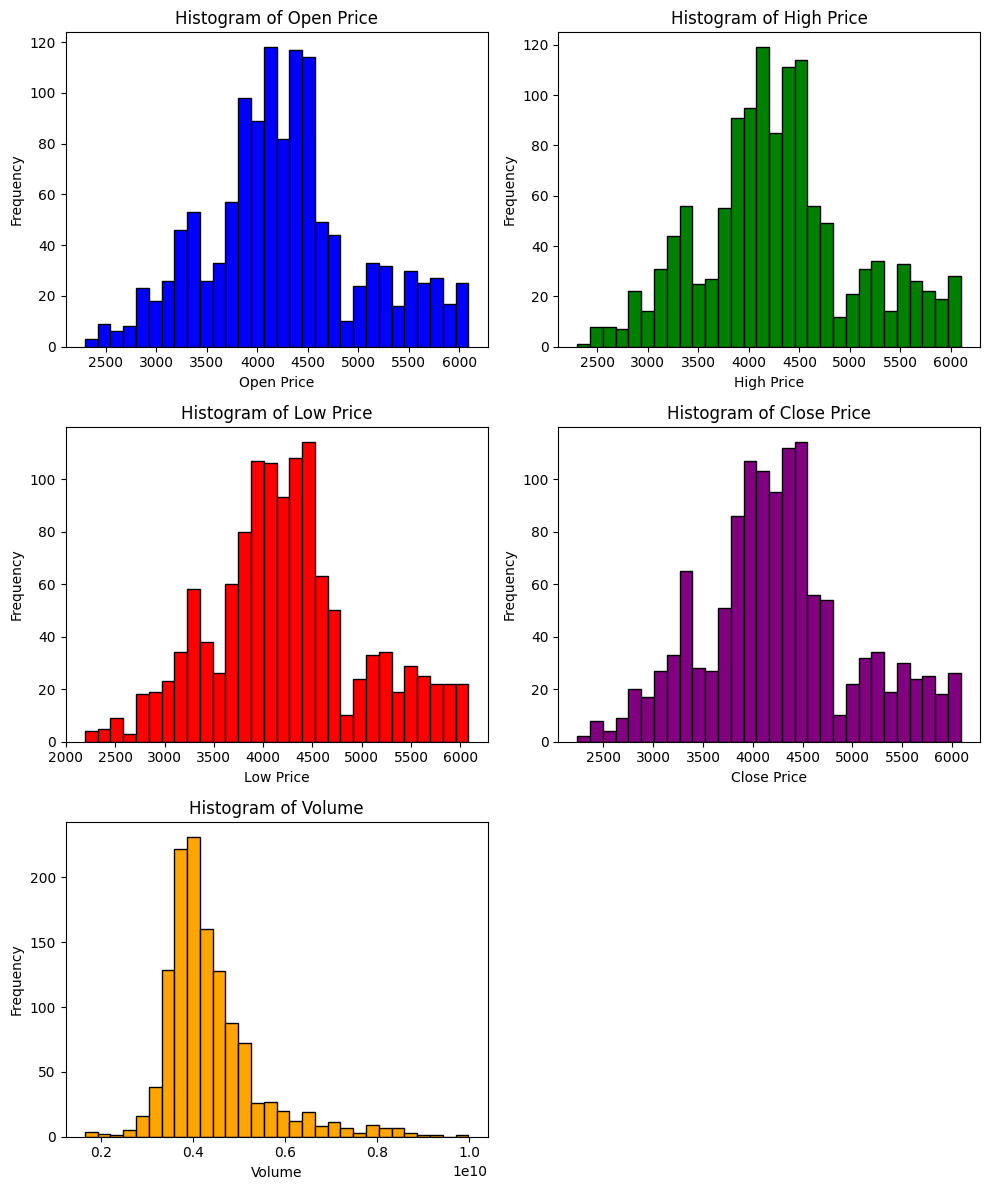

In [6]:
import matplotlib.pyplot as plt

#subplots layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

#histograms
axes[0, 0].hist(df["Open"], bins=30, color="blue", edgecolor="black")
axes[0, 0].set_title("Histogram of Open Price")
axes[0, 0].set_xlabel("Open Price")
axes[0, 0].set_ylabel("Frequency")

axes[0, 1].hist(df["High"], bins=30, color="green", edgecolor="black")
axes[0, 1].set_title("Histogram of High Price")
axes[0, 1].set_xlabel("High Price")
axes[0, 1].set_ylabel("Frequency")

axes[1, 0].hist(df["Low"], bins=30, color="red", edgecolor="black")
axes[1, 0].set_title("Histogram of Low Price")
axes[1, 0].set_xlabel("Low Price")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].hist(df["Close"], bins=30, color="purple", edgecolor="black")
axes[1, 1].set_title("Histogram of Close Price")
axes[1, 1].set_xlabel("Close Price")
axes[1, 1].set_ylabel("Frequency")

axes[2, 0].hist(df["Volume"], bins=30, color="orange", edgecolor="black")
axes[2, 0].set_title("Histogram of Volume")
axes[2, 0].set_xlabel("Volume")
axes[2, 0].set_ylabel("Frequency")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


#### Boxplots

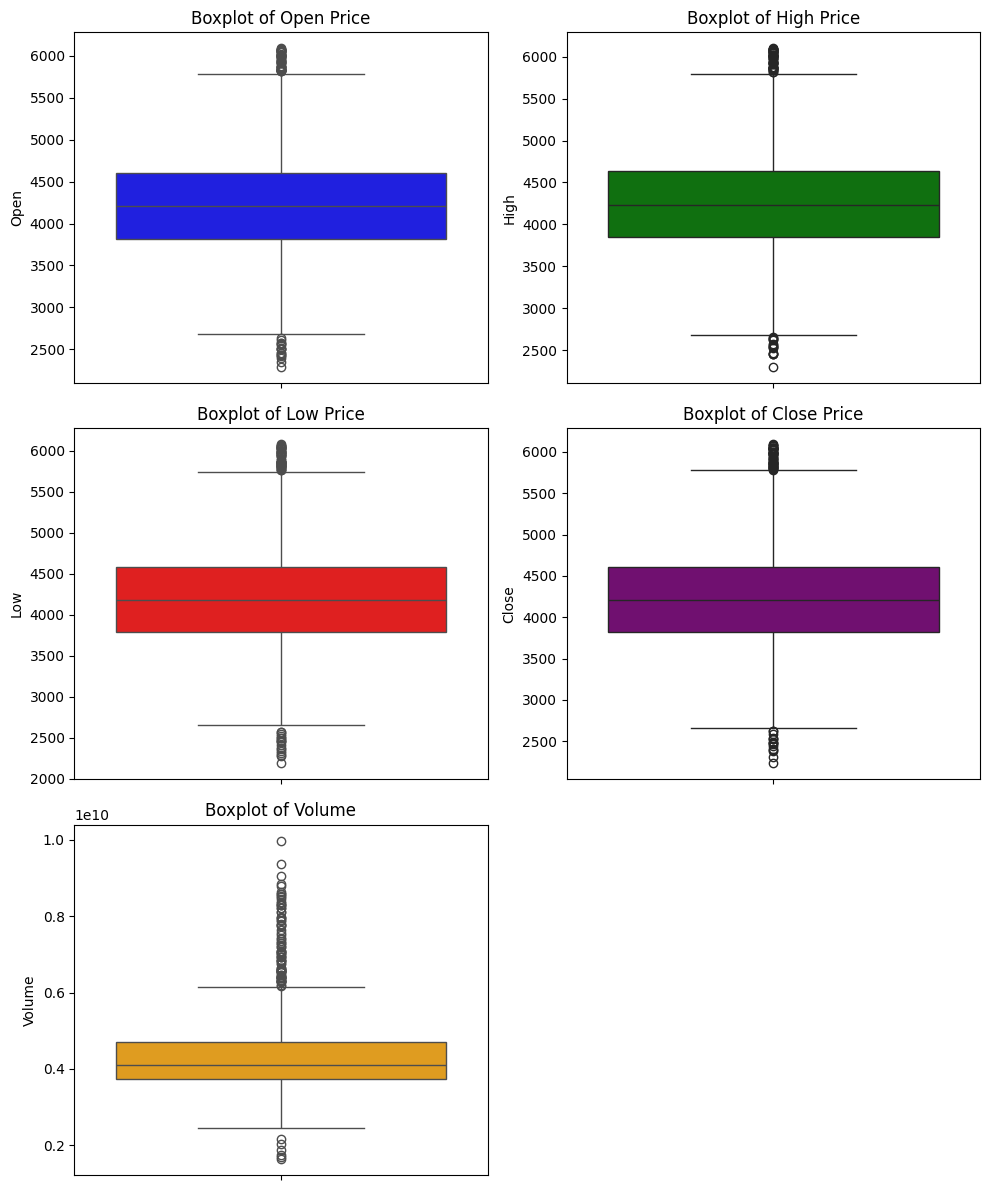

In [7]:
import seaborn as sns

#subplots layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

#boxplots
sns.boxplot(y=df["Open"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Boxplot of Open Price")

sns.boxplot(y=df["High"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Boxplot of High Price")

sns.boxplot(y=df["Low"], ax=axes[1, 0], color="red")
axes[1, 0].set_title("Boxplot of Low Price")

sns.boxplot(y=df["Close"], ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Boxplot of Close Price")

sns.boxplot(y=df["Volume"], ax=axes[2, 0], color="orange")
axes[2, 0].set_title("Boxplot of Volume")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

### Trends of the Variables

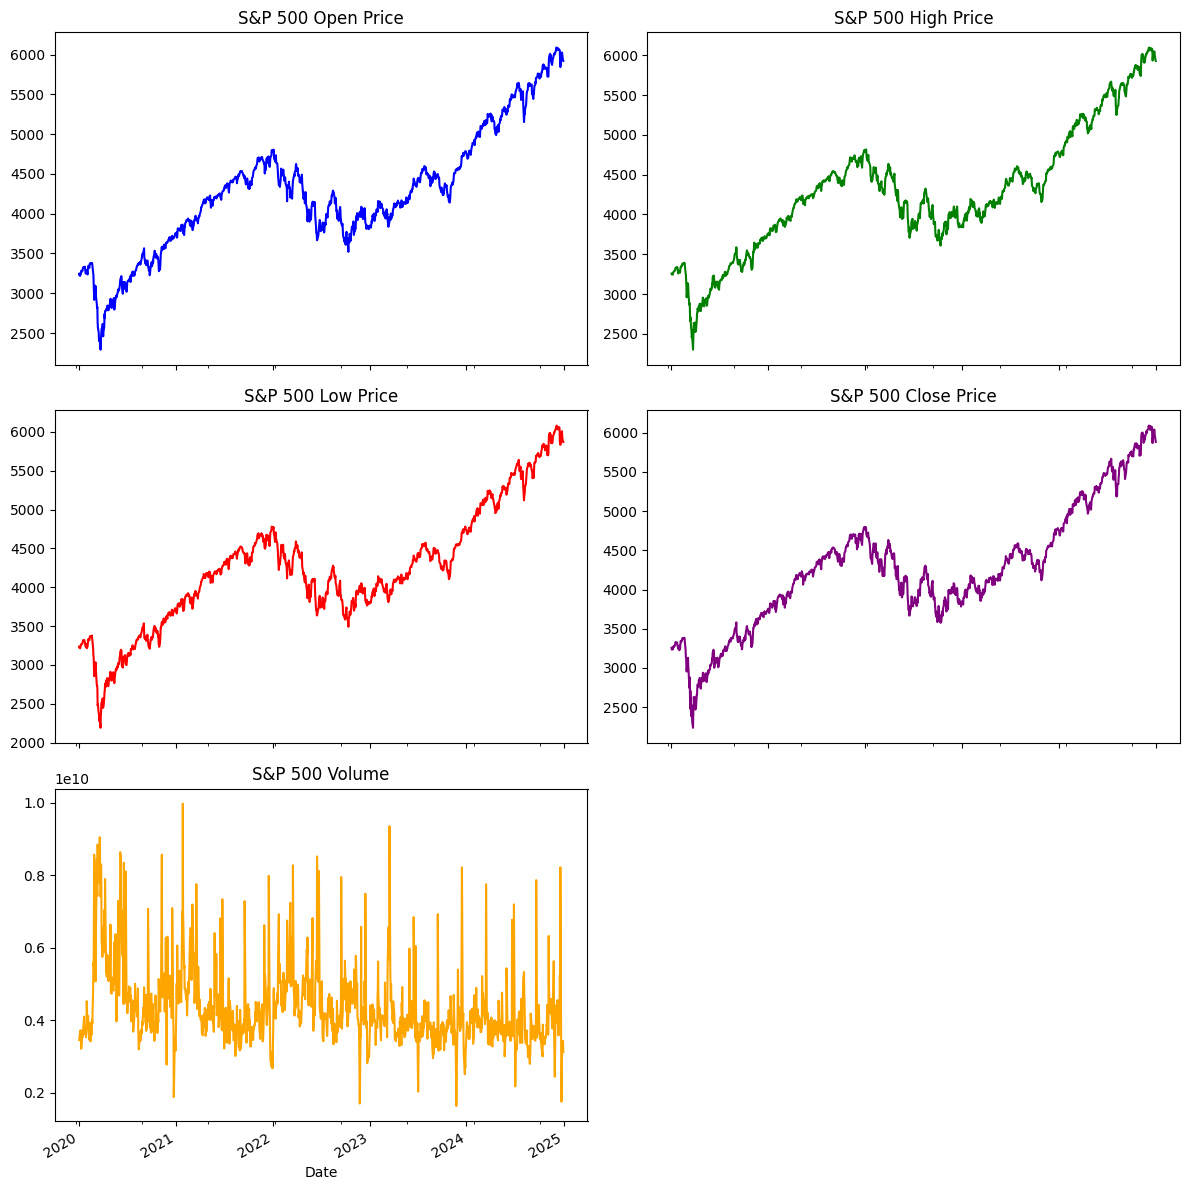

In [8]:

#Setting Date as index for time-series plotting
df.set_index("Date", inplace=True)

#subplots layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), sharex=True)

#lineplots
df["Open"].plot(ax=axes[0, 0], color="blue", title="S&P 500 Open Price")
df["High"].plot(ax=axes[0, 1], color="green", title="S&P 500 High Price")
df["Low"].plot(ax=axes[1, 0], color="red", title="S&P 500 Low Price")
df["Close"].plot(ax=axes[1, 1], color="purple", title="S&P 500 Close Price")
df["Volume"].plot(ax=axes[2, 0], color="orange", title="S&P 500 Volume")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

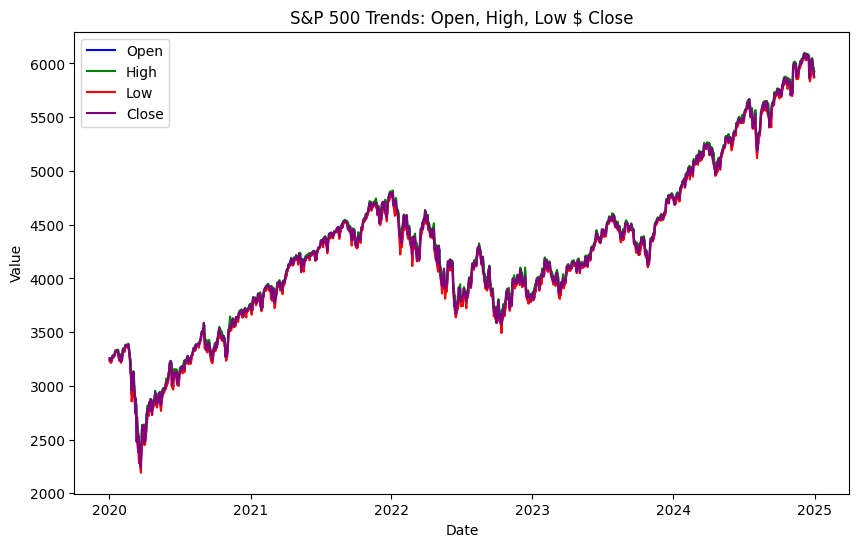

In [9]:
#all trend lines on the same graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Open"], label="Open", color="blue")
plt.plot(df.index, df["High"], label="High", color="green")
plt.plot(df.index, df["Low"], label="Low", color="red")
plt.plot(df.index, df["Close"], label="Close", color="purple")
#plt.plot(df.index, df["Volume"], label="Volume", color="orange", alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("S&P 500 Trends: Open, High, Low $ Close")
plt.legend()

plt.show()

### Mean Values of the Various Metrics by Day Of The Week

C:\Users\aramc\AppData\Local\Temp\ipykernel_38700\4079792104.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values["Open"], ax=axes[0, 0], palette="Blues")
C:\Users\aramc\AppData\Local\Temp\ipykernel_38700\4079792104.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values["High"], ax=axes[0, 1], palette="Greens")
C:\Users\aramc\AppData\Local\Temp\ipykernel_38700\4079792104.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values["Low"], ax=axes[1

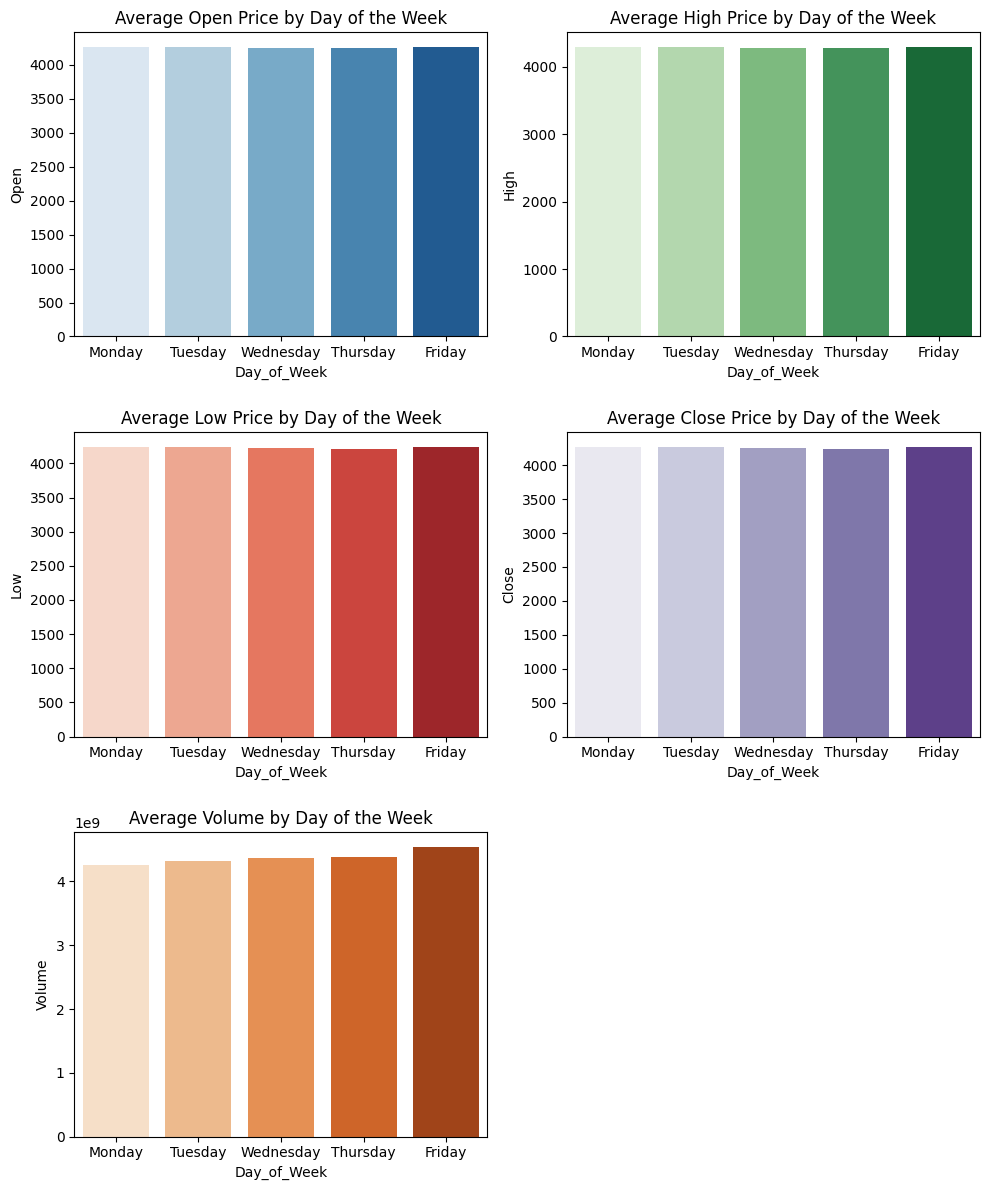

In [10]:
import seaborn as sns

mean_values = df.groupby("Day_of_Week")[["Open", "High", "Low", "Close", "Volume"]].mean()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
mean_values = mean_values.reindex(day_order)

#bar plots layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Plotting
sns.barplot(x=mean_values.index, y=mean_values["Open"], ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title("Average Open Price by Day of the Week")

sns.barplot(x=mean_values.index, y=mean_values["High"], ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title("Average High Price by Day of the Week")

sns.barplot(x=mean_values.index, y=mean_values["Low"], ax=axes[1, 0], palette="Reds")
axes[1, 0].set_title("Average Low Price by Day of the Week")

sns.barplot(x=mean_values.index, y=mean_values["Close"], ax=axes[1, 1], palette="Purples")
axes[1, 1].set_title("Average Close Price by Day of the Week")

sns.barplot(x=mean_values.index, y=mean_values["Volume"], ax=axes[2, 0], palette="Oranges")
axes[2, 0].set_title("Average Volume by Day of the Week")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

There is no fluctuation in the average variable values by day of the week, as seen in the barplots above.

### Mean Values Of Various Metrics by Month

C:\Users\aramc\AppData\Local\Temp\ipykernel_38700\1084738482.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values_month.index, y=mean_values_month["Open"], ax=axes[0, 0], palette="Blues")
C:\Users\aramc\AppData\Local\Temp\ipykernel_38700\1084738482.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values_month.index, y=mean_values_month["High"], ax=axes[0, 1], palette="Greens")
C:\Users\aramc\AppData\Local\Temp\ipykernel_38700\1084738482.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values_month.index, y

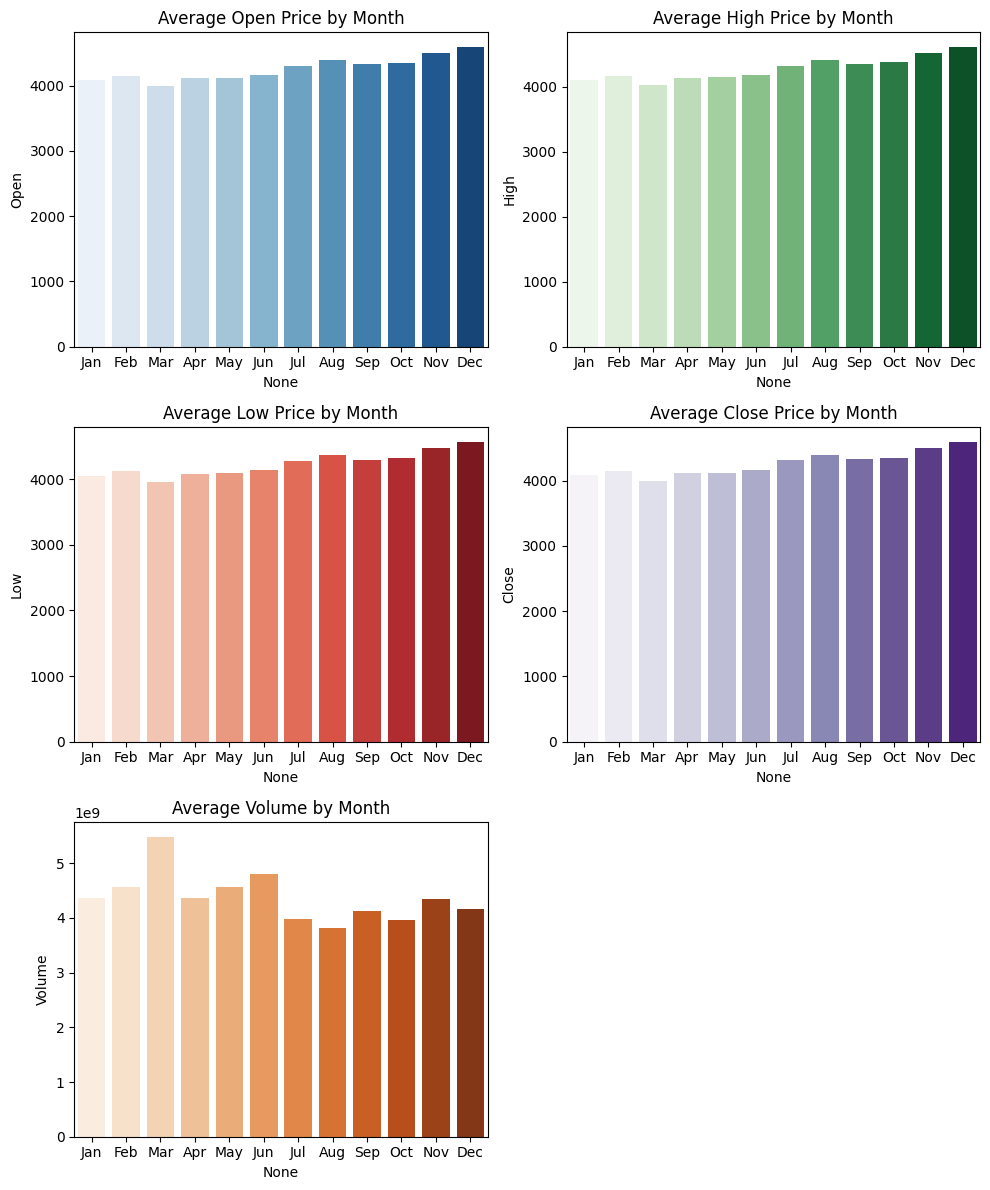

In [11]:
mean_values_month = df.groupby("Month")[["Open", "High", "Low", "Close", "Volume"]].mean()

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
mean_values_month.index = [month_names[i-1] for i in mean_values_month.index]

#bar plots layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

#Plotting
sns.barplot(x=mean_values_month.index, y=mean_values_month["Open"], ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title("Average Open Price by Month")

sns.barplot(x=mean_values_month.index, y=mean_values_month["High"], ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title("Average High Price by Month")

sns.barplot(x=mean_values_month.index, y=mean_values_month["Low"], ax=axes[1, 0], palette="Reds")
axes[1, 0].set_title("Average Low Price by Month")

sns.barplot(x=mean_values_month.index, y=mean_values_month["Close"], ax=axes[1, 1], palette="Purples")
axes[1, 1].set_title("Average Close Price by Month")

sns.barplot(x=mean_values_month.index, y=mean_values_month["Volume"], ax=axes[2, 0], palette="Oranges")
axes[2, 0].set_title("Average Volume by Month")


axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

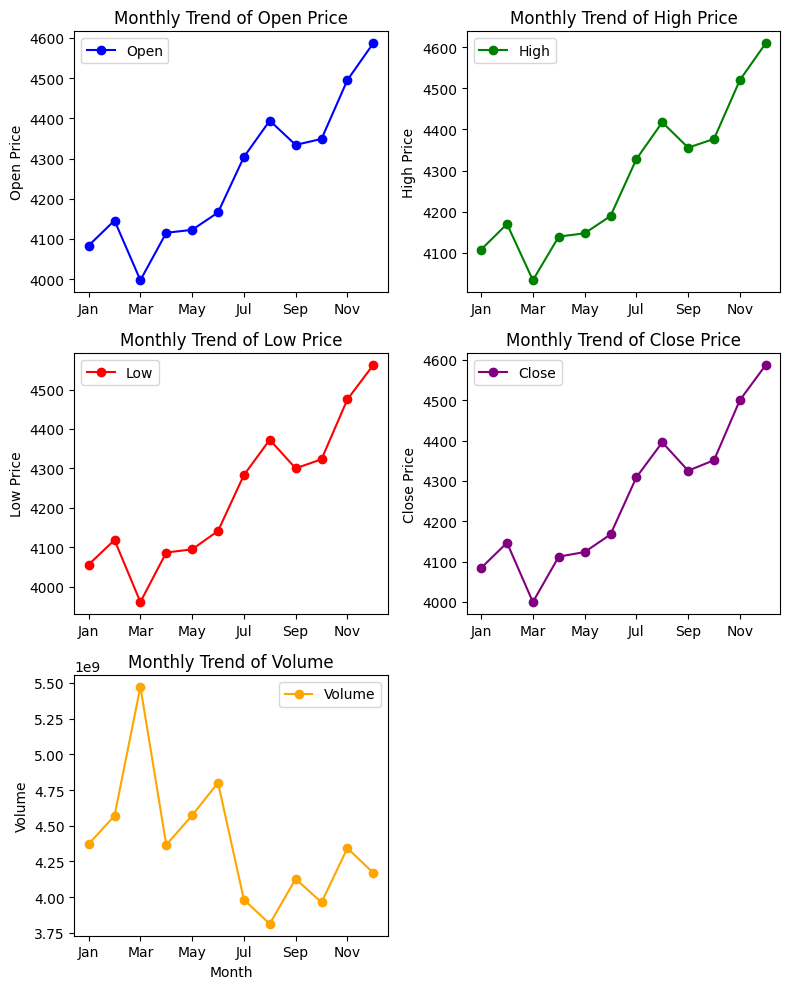

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), sharex=False)

#trend lines for each metric

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

axes[0, 0].plot(mean_values_month.index, mean_values_month["Open"], label="Open", color="blue", marker="o")
axes[0, 0].set_title("Monthly Trend of Open Price")
axes[0, 0].set_ylabel("Open Price")
axes[0, 0].legend()
axes[0, 0].set_xticks(mean_values_month.index[::2])
axes[0, 0].set_xticklabels(month_names[::2])

axes[0, 1].plot(mean_values_month.index, mean_values_month["High"], label="High", color="green", marker="o")
axes[0, 1].set_title("Monthly Trend of High Price")
axes[0, 1].set_ylabel("High Price")
axes[0, 1].legend()
axes[0, 1].set_xticks(mean_values_month.index[::2])
axes[0, 1].set_xticklabels(month_names[::2])

axes[1, 0].plot(mean_values_month.index, mean_values_month["Low"], label="Low", color="red", marker="o")
axes[1, 0].set_title("Monthly Trend of Low Price")
axes[1, 0].set_ylabel("Low Price")
axes[1, 0].legend()
axes[1, 0].set_xticks(mean_values_month.index[::2])
axes[1, 0].set_xticklabels(month_names[::2])

axes[1, 1].plot(mean_values_month.index, mean_values_month["Close"], label="Close", color="purple", marker="o")
axes[1, 1].set_title("Monthly Trend of Close Price")
axes[1, 1].set_ylabel("Close Price")
axes[1, 1].legend()
axes[1, 1].set_xticks(mean_values_month.index[::2])
axes[1, 1].set_xticklabels(month_names[::2])

axes[2, 0].plot(mean_values_month.index, mean_values_month["Volume"], label="Volume", color="orange", marker="o")
axes[2, 0].set_title("Monthly Trend of Volume")
axes[2, 0].set_ylabel("Volume")
axes[2, 0].legend()
axes[2, 0].set_xticks(mean_values_month.index[::2])
axes[2, 0].set_xticklabels(month_names[::2])

axes[2, 1].axis('off')
axes[2, 0].set_xlabel("Month")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Mean Values of Metrics by Year


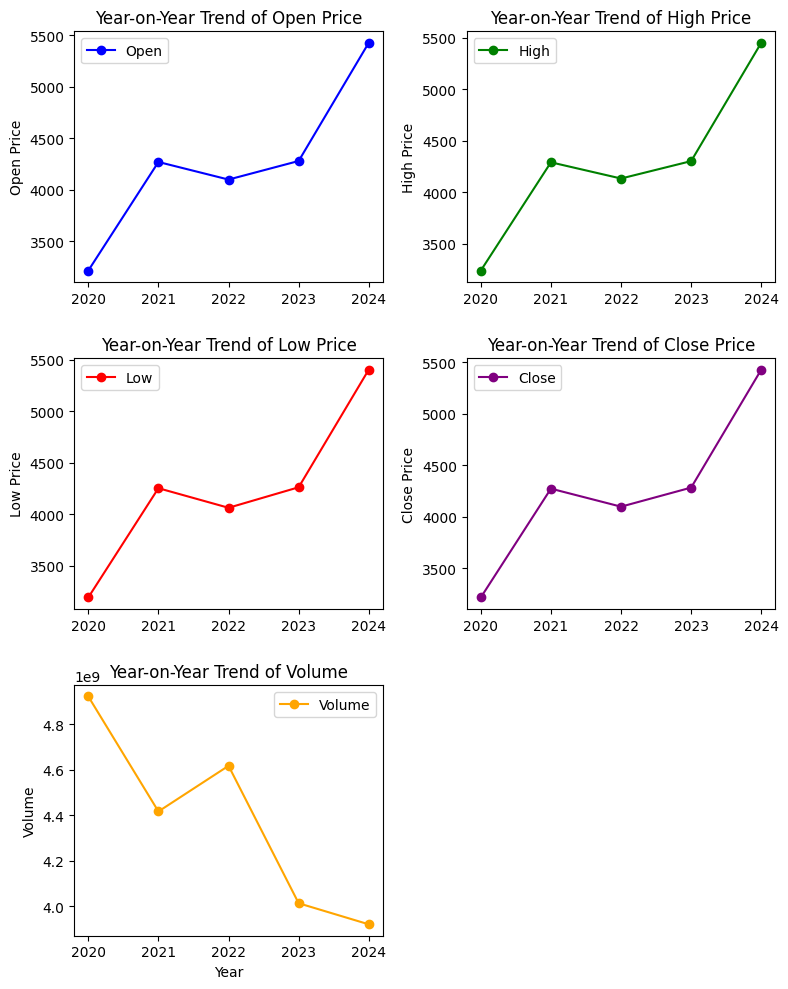

In [13]:
mean_values_year = df.groupby("Year")[["Open", "High", "Low", "Close", "Volume"]].mean()

#subplots layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), sharex=False)

#year-on-year trend lines
axes[0, 0].plot(mean_values_year.index, mean_values_year["Open"], label="Open", color="blue", marker="o")
axes[0, 0].set_title("Year-on-Year Trend of Open Price")
axes[0, 0].set_ylabel("Open Price")
axes[0, 0].legend()
axes[0, 0].set_xticks(mean_values_year.index)

axes[0, 1].plot(mean_values_year.index, mean_values_year["High"], label="High", color="green", marker="o")
axes[0, 1].set_title("Year-on-Year Trend of High Price")
axes[0, 1].set_ylabel("High Price")
axes[0, 1].legend()
axes[0, 1].set_xticks(mean_values_year.index)

axes[1, 0].plot(mean_values_year.index, mean_values_year["Low"], label="Low", color="red", marker="o")
axes[1, 0].set_title("Year-on-Year Trend of Low Price")
axes[1, 0].set_ylabel("Low Price")
axes[1, 0].legend()
axes[1, 0].set_xticks(mean_values_year.index)

axes[1, 1].plot(mean_values_year.index, mean_values_year["Close"], label="Close", color="purple", marker="o")
axes[1, 1].set_title("Year-on-Year Trend of Close Price")
axes[1, 1].set_ylabel("Close Price")
axes[1, 1].legend()
axes[1, 1].set_xticks(mean_values_year.index)

axes[2, 0].plot(mean_values_year.index, mean_values_year["Volume"], label="Volume", color="orange", marker="o")
axes[2, 0].set_title("Year-on-Year Trend of Volume")
axes[2, 0].set_ylabel("Volume")
axes[2, 0].legend()
axes[2, 0].set_xticks(mean_values_year.index)


axes[2, 1].axis('off')


axes[2, 0].set_xlabel("Year")
axes[2, 1].set_xlabel("Year")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Scatterplots to Explore the Relationships between the Variables

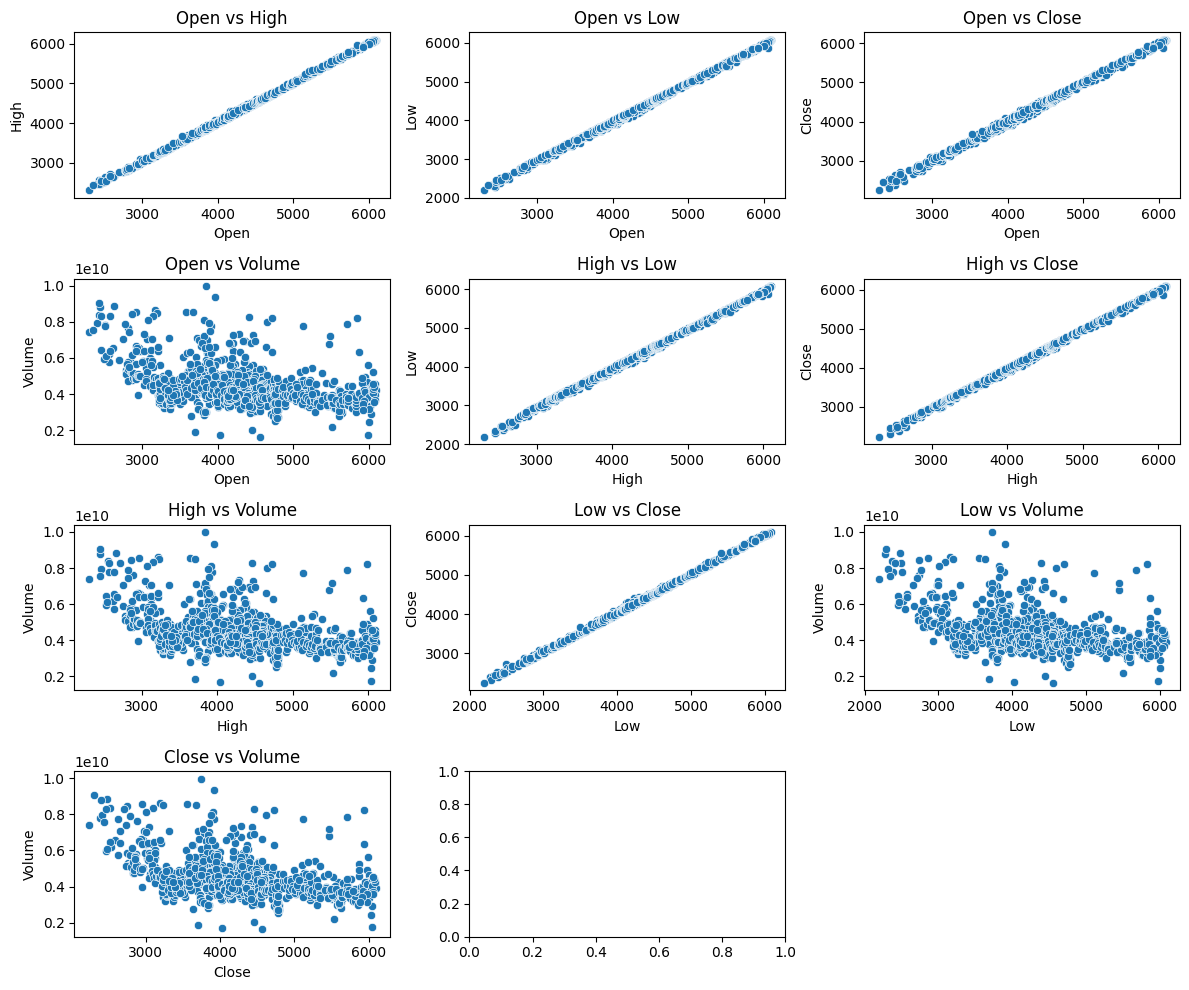

In [14]:
import itertools

variables = ["Open", "High", "Low", "Close", "Volume"]

#creating all unique pairs of variables
pairs = list(itertools.combinations(variables, 2))

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))

axes = axes.flatten()

#Plotting each pair
for i, (x_var, y_var) in enumerate(pairs):
    sns.scatterplot(x=df[x_var], y=df[y_var], ax=axes[i])
    axes[i].set_title(f"{x_var} vs {y_var}")

axes[-1].axis('off')

plt.tight_layout()
plt.show()

From the scatterplots above, we can see that Open, High, Low and Close all seem to be positively related to each other. An increase in one variable leads to an increase in the other
variable as well. I will investigate the strength of these relationships by looking at their respective correlations.  

### Correlations

            Open      High       Low     Close    Volume
Open    1.000000  0.999569  0.999357  0.998775 -0.399236
High    0.999569  1.000000  0.999235  0.999351 -0.393526
Low     0.999357  0.999235  1.000000  0.999472 -0.410641
Close   0.998775  0.999351  0.999472  1.000000 -0.403355
Volume -0.399236 -0.393526 -0.410641 -0.403355  1.000000


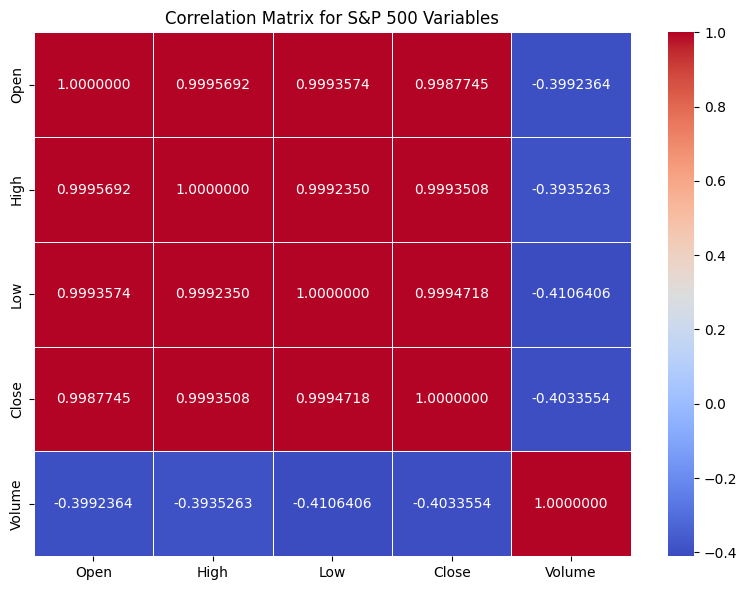

In [15]:
correlation_matrix = df[["Open", "High", "Low", "Close", "Volume"]].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".7f", linewidths=0.5)
plt.title("Correlation Matrix for S&P 500 Variables")
plt.tight_layout()
plt.show()

From the corrrealtions and correlation matrix generated above, it is evident that Open, High, Low and Close are very highly positively correlated with each other, with correlation coefficients very close to 1. Voulme, however, goes against this trend as it is negatively correlated with all the other variables, with moderate negative correlations ranging from -0.3992 to -0.40336, meaning that an increase in volume leads to a decrease in the other variables and vice versa.

# Feature Engineering and Data Preprocessing.

In [16]:
df.reset_index(inplace=True)
data = df[["Date", "Open", "High", "Low", "Close", "Volume"]]

In [17]:
data['Candle_Body'] = abs(data['Open'] - data['Close'])
data['Next_day_Open']=data['Open'].shift(-1)
data['Next_day_Close']=data['Close'].shift(-1)
data = data.dropna()

C:\Users\aramc\AppData\Local\Temp\ipykernel_38700\2167460307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Candle_Body'] = abs(data['Open'] - data['Close'])
C:\Users\aramc\AppData\Local\Temp\ipykernel_38700\2167460307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Next_day_Open']=data['Open'].shift(-1)


I have created three new variables which are Candle body, Next Day open and Next Day Close.  "Candle Body" is the difference between the Open and Close prices, while "Next Day Open" and "Next Day Close" prices are the following day's opening and closing prices respectively.

### Scaling the Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

#Excluding 'Date' and 'Next_day_Close' from scaling
columns_to_scale = [col for col in data.columns if col not in ["Date", "Next_day_Close"]]

scaler = MinMaxScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

### Feature Selection and Splitting the Data into Training and Test Sets

Before embarking on model building, it is important to select features that I will use to train the model.  
"Open", "High", "Low", "Volume", "Candle_Body" and "Next_Day_Open" will be the features/input variables.  
"Next_Day_Close" will be the target/output variable.

In [19]:
X = data.drop(columns=["Date", "Next_day_Close"])
y = data["Next_day_Close"]

Next, the data will be split into training and testing sets to enable model building and evaluation. The split ratio will be 80% for the training data and 20% for the test data.  
Since this is time series data, the data will not be randomly split. I will use 2020, 2021, 2022 and 2023 data arranged datewise as the training data, while 2024 data will be the test data.  

In [20]:
data["Date"] = pd.to_datetime(data["Date"])
split_date = "2024-01-01"

#Training set (2020-2023)
X_train = X[data["Date"] < split_date]
y_train = y[data["Date"] < split_date]

#Testing set (2024)
X_test = X[data["Date"] >= split_date]
y_test = y[data["Date"] >= split_date]

# Model Building and Evaluation

## Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

#Initializing and Training the Model
model = LinearRegression()
#model.fit(X_train, y_train.ravel())
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

#Model Evaluation
r2_test = metrics.r2_score(y_test, y_pred)
r2_train = model.score(X_train, y_train)
lr_mse = metrics.mean_squared_error(y_test, y_pred)
lr_mae = metrics.mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

print('Model Accuracy (Test R² Score):', r2_test)
print('Model Accuracy (Train R² Score):', r2_train)
print('Mean Absolure Error (MAE):', lr_mae)
print('Mean Squared Error (MSE):', lr_mse)
print('Root Mean Squared Error (RMSE):', lr_rmse)

Model Accuracy (Test R² Score): 0.9910055644590854
Model Accuracy (Train R² Score): 0.994884382723991
Mean Absolure Error (MAE): 25.30226268400241
Mean Squared Error (MSE): 1201.6291254442688
Root Mean Squared Error (RMSE): 34.664522576321005


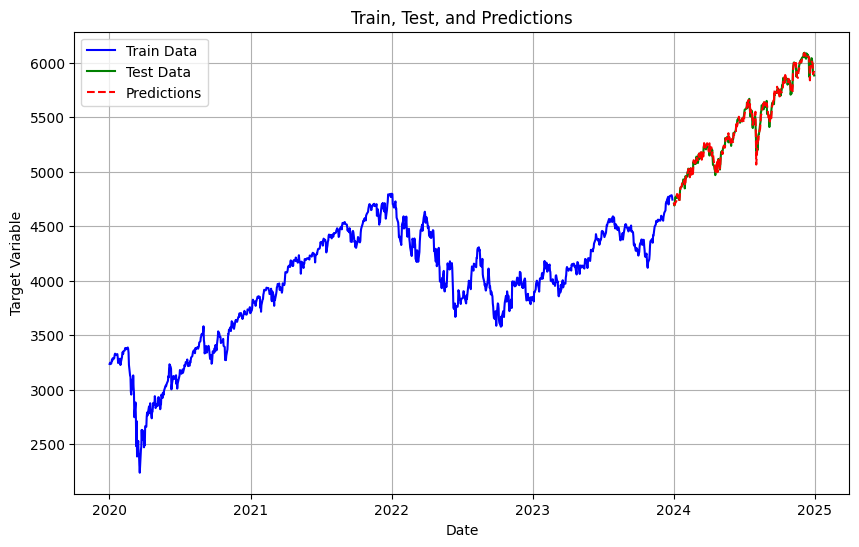

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(data["Date"][data["Date"] < split_date], y_train, label="Train Data", color="blue")
plt.plot(data["Date"][data["Date"] >= split_date], y_test, label="Test Data", color="green")
plt.plot(data["Date"][data["Date"] >= split_date], y_pred, label="Predictions", linestyle="dashed", color="red")

plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.title("Train, Test, and Predictions")
plt.legend()
plt.grid(True)
plt.show()

The linear regression model demonstrates excellent performance, achieving a Test R² Score of 0.9910 and a Train R² Score of 0.9949, indicating a strong fit with minimal overfitting, while the low MAE (25.30), MSE (1201.6291) and RMSE (34.6645) suggest highly accurate predictions with minimal error.

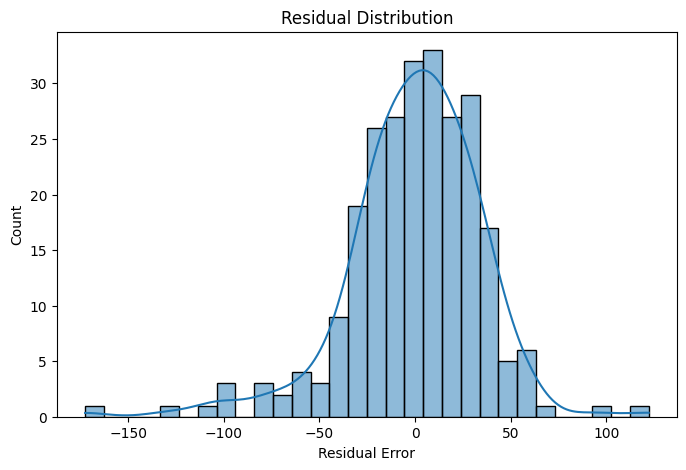

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual Error")
plt.show()

A histogram of the residuals shows that although there is a little bit of skew, most of the erros are centered around the zero mark, with the distribution being approxiamtely normal.

## Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using R², MSE, and RMSE
from sklearn.metrics import mean_squared_error, r2_score
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print("Random Forest Model Accuracy (Test R² Score):", r2_rf)
print("Random Forest Model Accuracy (Train R² Score):", rf_model.score(X_train, y_train))
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)


Random Forest Model Accuracy (Test R² Score): -3.5239379514330516
Random Forest Model Accuracy (Train R² Score): 0.9989361529422858
Mean Absolute Error (MAE): 687.6191337190301
Mean Squared Error (MSE): 604384.2973154293
Root Mean Squared Error (RMSE): 777.4215698804795


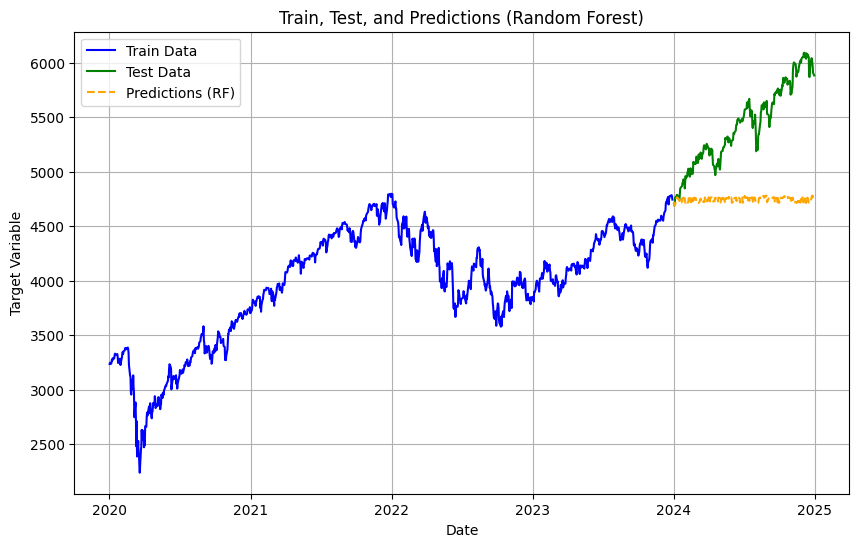

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data["Date"][data["Date"] < split_date], y_train, label="Train Data", color="blue")
plt.plot(data["Date"][data["Date"] >= split_date], y_test, label="Test Data", color="green")
plt.plot(data["Date"][data["Date"] >= split_date], y_pred_rf, label="Predictions (RF)", linestyle="dashed", color="orange")

plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.title("Train, Test, and Predictions (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

The Random Forest Model performs poorly. It appears to be overfitting, judging from the disparity in the performance in the training set and test set. The training set R^2 score is way higher than the test set one, hinting that the model may have essentially memorized the patterns in the data as opposed to actually learning them.

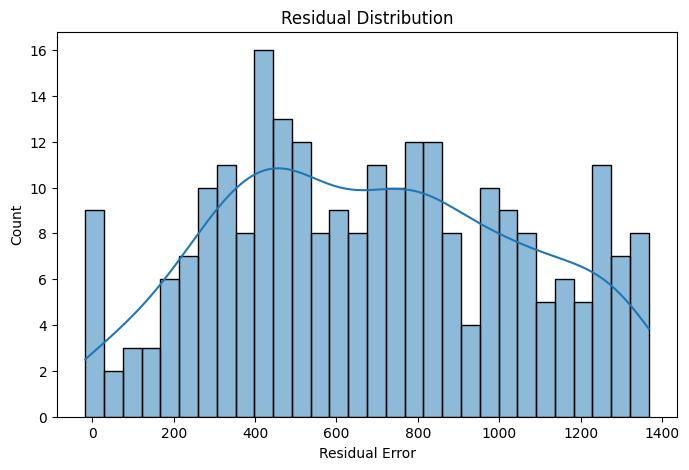

In [26]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual Error")
plt.show()

Most of the residuals are larger than zero, with the distribution showing a heavy skew, departure from normality.

## Moving Average Model

### 3- Day Moving Average

In [27]:
madf["Date"] = pd.to_datetime(madf["Date"])
madf = madf.sort_values(by="Date")

# Moving average features
madf["Close_3MA"] = madf["Close"].rolling(window=3).mean()
madf["Close_7MA"] = madf["Close"].rolling(window=7).mean()
madf["Close_14MA"] = madf["Close"].rolling(window=14).mean()
madf.dropna(inplace=True)

# Features and target
ma_X = madf[["Close_3MA", "Close_7MA", "Close_14MA"]]
ma_Y = madf["Close"]
dates = madf["Date"]
split_date = "2024-01-01"

# Train-test split
ma_X_train = ma_X[madf["Date"] < split_date]
ma_Y_train = ma_Y[madf["Date"] < split_date]
ma_X_test = ma_X[madf["Date"] >= split_date]
ma_Y_test = ma_Y[madf["Date"] >= split_date]
dates_test = dates[madf["Date"] >= split_date]

# Use the last known Close_3MA as predictions
ma_Y_pred = ma_X_test["Close_3MA"]

# Future Predictions (Next 10 Days)
future_dates = pd.date_range(start=dates_test.max(), periods=11, freq="D")[1:]

# Initialize future predictions list with the last known values
future_closes = list(ma_Y_test[-3:].values)  # Use last 3 actual closing values

# Generate future predictions iteratively
for _ in range(len(future_dates)):
    # Calculate new moving average based on the last 3 values
    future_3MA = np.mean(future_closes[-3:])

    # Append new predicted close price
    future_closes.append(future_3MA)

# Remove initial test values, keeping only new future predictions
future_preds = future_closes[3:]

# Create DataFrame for Future Predictions
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Close": future_preds
})
ma3_future_df = future_df.copy()

# Evaluate Model
three_mae = metrics.mean_absolute_error(ma_Y_test, ma_Y_pred)
three_mse = metrics.mean_squared_error(ma_Y_test, ma_Y_pred)
three_rmse = np.sqrt(three_mse)

print("Moving Average Model (SMA) Performance:")
print("Mean Absolute Error (MAE):", three_mae)
print("Mean Squared Error (MSE):", three_mse)
print("Root Mean Squared Error (RMSE):", three_rmse)

Moving Average Model (SMA) Performance:
Mean Absolute Error (MAE): 24.98610336061497
Mean Squared Error (MSE): 1096.975115525445
Root Mean Squared Error (RMSE): 33.120614661045245


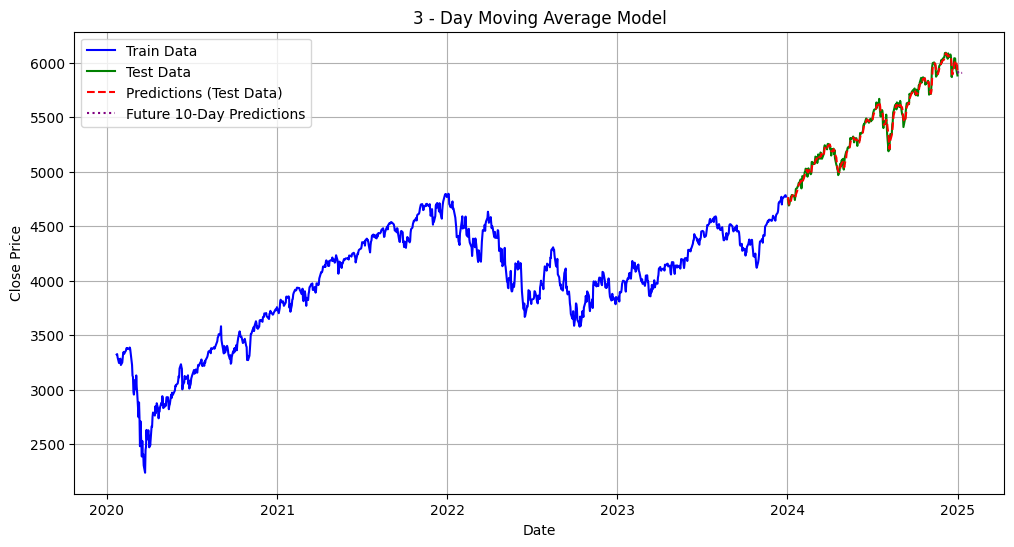

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(dates[madf["Date"] < split_date], ma_Y_train, label="Train Data", color="blue")
plt.plot(dates_test, ma_Y_test, label="Test Data", color="green")
plt.plot(dates_test, ma_Y_pred, label="Predictions (Test Data)", linestyle="dashed", color="red")
plt.plot(future_df["Date"], future_df["Predicted Close"], label="Future 10-Day Predictions", linestyle="dotted", color="purple")

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("3 - Day Moving Average Model")
plt.legend()
plt.grid(True)
plt.show()

### 7 Day Moving Average

In [29]:
madf["Close_3MA"] = madf["Close"].rolling(window=3).mean()
madf["Close_7MA"] = madf["Close"].rolling(window=7).mean()
madf["Close_14MA"] = madf["Close"].rolling(window=14).mean()
madf.dropna(inplace=True)

# Features and target
ma_X = madf[["Close_3MA", "Close_7MA", "Close_14MA"]]
ma_Y = madf["Close"]
dates = madf["Date"]
split_date = "2024-01-01"

# Train-test split
ma_X_train = ma_X[madf["Date"] < split_date]
ma_Y_train = ma_Y[madf["Date"] < split_date]
ma_X_test = ma_X[madf["Date"] >= split_date]
ma_Y_test = ma_Y[madf["Date"] >= split_date]
dates_test = dates[madf["Date"] >= split_date]

# Use the last known Close_7MA as predictions
ma_Y_pred = ma_X_test["Close_7MA"]

# Future Predictions (Next 10 Days) using 7-day moving average
future_dates = pd.date_range(start=dates_test.max(), periods=11, freq="D")[1:]

# Initialize with last 7 known values
future_values = list(ma_Y.iloc[-7:].values)

for _ in range(10):
    next_pred = np.mean(future_values[-7:])  # Compute 7-day moving average
    future_values.append(next_pred)

# Get only the next 10 predictions
future_preds_7MA = future_values[-10:]

# Create DataFrame for Future Predictions
future_df_7MA = pd.DataFrame({
    "Date": future_dates,
    "Predicted Close (7MA)": future_preds_7MA
})

# Evaluate Model
seven_mae = metrics.mean_absolute_error(ma_Y_test, ma_Y_pred)
seven_mse = metrics.mean_squared_error(ma_Y_test, ma_Y_pred)
seven_rmse = np.sqrt(seven_mse)

print("Moving Average Model (SMA) Performance:")
print("Mean Absolute Error (MAE):", seven_mae)
print("Mean Squared Error (MSE):", seven_mse)
print("Root Mean Squared Error (RMSE):", seven_rmse)

Moving Average Model (SMA) Performance:
Mean Absolute Error (MAE): 46.41727757183601
Mean Squared Error (MSE): 3486.037244618324
Root Mean Squared Error (RMSE): 59.042673081579935


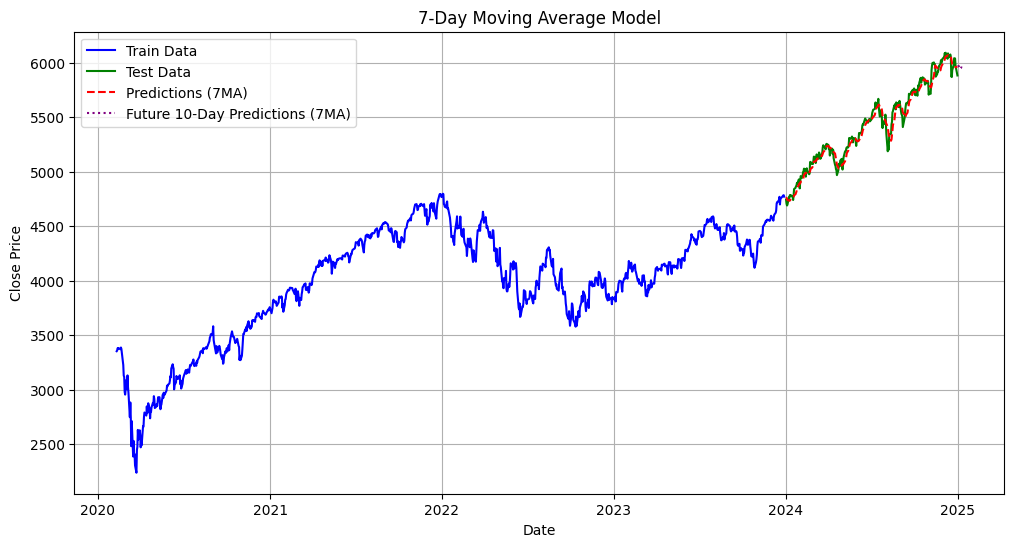

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(dates[madf["Date"] < split_date], ma_Y_train, label="Train Data", color="blue")
plt.plot(dates_test, ma_Y_test, label="Test Data", color="green")
plt.plot(dates_test, ma_Y_pred, label="Predictions (7MA)", linestyle="dashed", color="red")
plt.plot(future_df_7MA["Date"], future_df_7MA["Predicted Close (7MA)"], label="Future 10-Day Predictions (7MA)", linestyle="dotted", color="purple")

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("7-Day Moving Average Model")
plt.legend()
plt.grid(True)
plt.show()

### 14-Day Moving Average

In [31]:
madf["Close_3MA"] = madf["Close"].rolling(window=3).mean()
madf["Close_7MA"] = madf["Close"].rolling(window=7).mean()
madf["Close_14MA"] = madf["Close"].rolling(window=14).mean()
madf.dropna(inplace=True)

# Features and target
ma_X = madf[["Close_3MA", "Close_7MA", "Close_14MA"]]
ma_Y = madf["Close"]
dates = madf["Date"]
split_date = "2024-01-01"

# Train-test split
ma_X_train = ma_X[madf["Date"] < split_date]
ma_Y_train = ma_Y[madf["Date"] < split_date]
ma_X_test = ma_X[madf["Date"] >= split_date]
ma_Y_test = ma_Y[madf["Date"] >= split_date]
dates_test = dates[madf["Date"] >= split_date]

# Use the last known Close_14MA as predictions
ma_Y_pred = ma_X_test["Close_14MA"]

# Future Predictions (Next 10 Days) using 14-day moving average
future_dates = pd.date_range(start=dates_test.max(), periods=11, freq="D")[1:]

# Initialize with last 14 known values
future_values = list(ma_Y.iloc[-14:].values)

for _ in range(10):
    next_pred = np.mean(future_values[-14:])  # Compute 14-day moving average
    future_values.append(next_pred)

# Get only the next 10 predictions
future_preds_14MA = future_values[-10:]

# Create DataFrame for Future Predictions
future_df_14MA = pd.DataFrame({
    "Date": future_dates,
    "Predicted Close (14MA)": future_preds_14MA
})

# Evaluate Model
fourteen_mae = metrics.mean_absolute_error(ma_Y_test, ma_Y_pred)
fourteen_mse = metrics.mean_squared_error(ma_Y_test, ma_Y_pred)
fourteen_rmse = np.sqrt(fourteen_mse)

print("Moving Average Model (SMA) Performance:")
print("Mean Absolute Error (MAE):", fourteen_mae)
print("Mean Squared Error (MSE):", fourteen_mse)
print("Root Mean Squared Error (RMSE):", fourteen_rmse)

Moving Average Model (SMA) Performance:
Mean Absolute Error (MAE): 69.09714568607392
Mean Squared Error (MSE): 7178.185577302082
Root Mean Squared Error (RMSE): 84.72417351206255


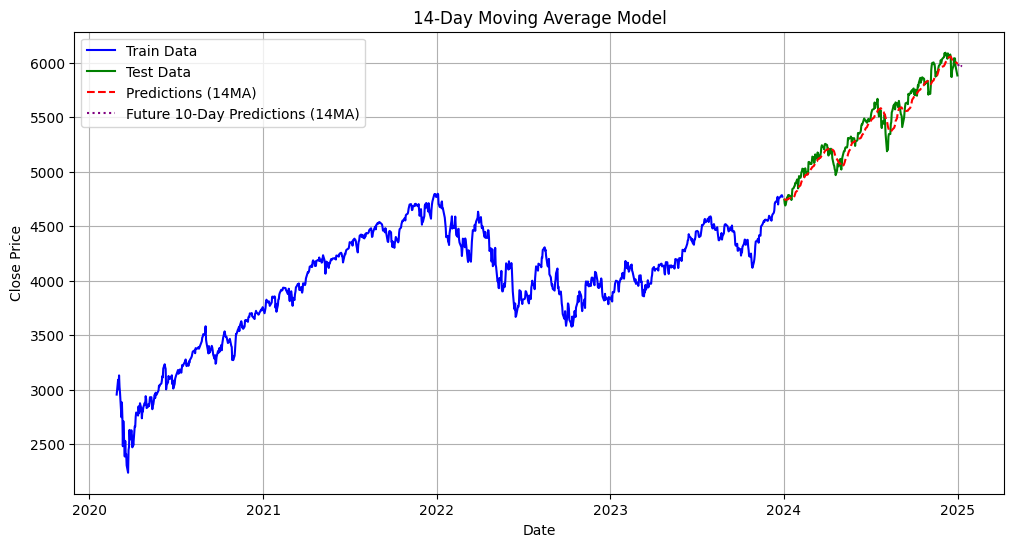

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(dates[madf["Date"] < split_date], ma_Y_train, label="Train Data", color="blue")
plt.plot(dates_test, ma_Y_test, label="Test Data", color="green")
plt.plot(dates_test, ma_Y_pred, label="Predictions (14MA)", linestyle="dashed", color="red")
plt.plot(future_df_14MA["Date"], future_df_14MA["Predicted Close (14MA)"], label="Future 10-Day Predictions (14MA)", linestyle="dotted", color="purple")

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("14-Day Moving Average Model")
plt.legend()
plt.grid(True)
plt.show()

The three-day Moving Average model is the best performing Moving Average model, as it has the lowest MAE, MSE and RMSE compared to the 7-day and 14-day moving averages.

## ARIMA Model

In [33]:
!pip install pmdarima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

ardf["Date"] = pd.to_datetime(ardf["Date"])
ardf = ardf.sort_values(by="Date")

#Features and target
ar_Y = ardf["Close"]
dates = ardf["Date"]
split_date = "2024-01-01"

#Train-test split
artrain = ar_Y[ardf["Date"] < split_date]
artest = ar_Y[ardf["Date"] >= split_date]
dates_train = dates[ardf["Date"] < split_date]
dates_test = dates[ardf["Date"] >= split_date]

#Checking for stationarity
adf_test = adfuller(artrain)
adf_test[1]

#Optimizing ARIMA order
best_order = auto_arima(artrain, seasonal=False, stepwise=True, trace=True).order
best_order

#Training ARIMA model with optimized parameters
armodel = ARIMA(artrain, order=best_order)
model_fit = armodel.fit()

#Predictions on test data (using dynamic forecasting)
history = artrain.tolist()
preds = []

for actual in artest:
    model_dyn = ARIMA(history, order=best_order).fit()
    pred = model_dyn.forecast(steps=1)[0]
    preds.append(pred)
    history.append(actual)  # Update history with actual value

#Future Predictions (Next 10 Days)
future_dates = pd.date_range(start=dates_test.max(), periods=11, freq="D")[1:]
future_preds = model_fit.forecast(steps=10)
ar_future_preds = future_preds.copy()

#DataFrame for Future Predictions
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Close": future_preds
})


#Model Evaluation
armae = metrics.mean_absolute_error(artest, preds)
armse = metrics.mean_squared_error(artest, preds)
arrmse = np.sqrt(armse)

print(f"Mean Absolute Error (MAE): {armae:.4f}")
print(f"Mean Squared Error (MSE): {armse:.4f}")
print(f"Root Mean Squared Error (RMSE): {arrmse:.4f}")

C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10664.870, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10716.737, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10705.972, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10707.499, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10715.648, Time=0.00 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10705.363, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10705.735, Time=0.16 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10666.246, Time=0.79 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10708.212, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10705.025, Time=0.12 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10706.167, Time=0.36 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10706.893, Time=0.38 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10668.326, Time=0.88 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10663.942, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10704.367, Time=0.12 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10704.748, Time=0.10 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=10665.242, Time=0.39 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=10707.259, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10704.127, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=10705.282, Time=0.13 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=10706.004, Time=0.17 sec


C:\Users\aramc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=10667.766, Time=0.63 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 6.504 seconds
Mean Absolute Error (MAE): 33.4089
Mean Squared Error (MSE): 1978.7469
Root Mean Squared Error (RMSE): 44.4831


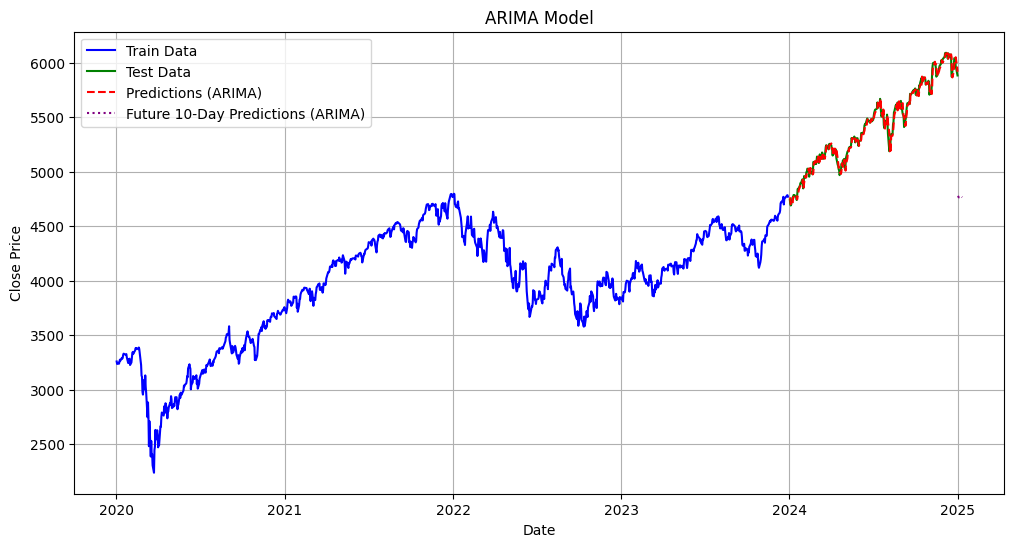

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(dates_train, artrain, label="Train Data", color="blue")
plt.plot(dates_test, artest, label="Test Data", color="green")
plt.plot(dates_test, preds, label="Predictions (ARIMA)", linestyle="dashed", color="red")
plt.plot(future_df["Date"], future_df["Predicted Close"], label="Future 10-Day Predictions (ARIMA)", linestyle="dotted", color="purple")

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("ARIMA Model")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Create a DataFrame to display the metrics as a table
metrics_data = {
    "Model": ["Linear Regression", "Random Forest", "3-Day MA", "7-Day MA", "14-Day MA", "ARIMA"],
    "MAE": [lr_mae, mae_rf, three_mae, seven_mae, fourteen_mae, armae],
    "MSE": [lr_mse, mse_rf, three_mse, seven_mse, fourteen_mse, armse],
    "RMSE": [lr_rmse, rmse_rf, three_rmse, seven_rmse, fourteen_rmse, arrmse]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)


               Model         MAE            MSE        RMSE
0  Linear Regression   25.302263    1201.629125   34.664523
1      Random Forest  687.619134  604384.297315  777.421570
2           3-Day MA   24.986103    1096.975116   33.120615
3           7-Day MA   46.417278    3486.037245   59.042673
4          14-Day MA   69.097146    7178.185577   84.724174
5              ARIMA   33.408942    1978.746865   44.483108


In [36]:
# Combine future predictions into a single DataFrame
future_comparison_df = pd.DataFrame({
    "Date": future_dates,
    "3-Day MA Predicted Close": future_preds,
    "7-Day MA Predicted Close": future_preds_7MA,
    "14-Day MA Predicted Close": future_preds_14MA,
    "ARIMA Predicted Close": ar_future_preds  # Adjust if ARIMA's future predictions are in a different variable
})

# Display the combined table
print(future_comparison_df)


           Date  3-Day MA Predicted Close  7-Day MA Predicted Close  \
1006 2025-01-01               4762.803718               5963.137068   
1007 2025-01-02               4770.328852               5967.749492   
1008 2025-01-03               4763.301804               5966.846587   
1009 2025-01-04               4769.006349               5956.390380   
1010 2025-01-05               4765.192152               5944.790456   
1011 2025-01-06               4766.847455               5941.069115   
1012 2025-01-07               4767.319745               5945.944712   
1013 2025-01-08               4765.013972               5955.132544   
1014 2025-01-09               4768.662144               5953.989041   
1015 2025-01-10               4764.276416               5952.023262   

      14-Day MA Predicted Close  ARIMA Predicted Close  
1006                5985.172817            4762.803718  
1007                5978.100165            4770.328852  
1008                5972.875177            4763

In [37]:
metrics_df.to_excel("model_metrics.xlsx", index=False)

with pd.ExcelWriter("future_predictions.xlsx") as writer:
    future_comparison_df.to_excel(writer, sheet_name="Future Predictions", index=False)

print("Files saved successfully.")


Files saved successfully.
